In [1]:
import pandas as pd
import numpy as np
import glob

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['image.cmap'] = 'hot_r'
from matplotlib.colors import LogNorm

from scipy.optimize import curve_fit

%matplotlib inline

In [106]:
#indir = "/eos/user/a/alobanov/HGCAL/testbeam/analysis/TOA/scripts/calib_oct2018/"
indir = "/eos/user/a/alobanov/HGCAL/testbeam/analysis/TOA/scripts/repo/sk2cms-calibration/TOA/calib_oct2018/"

In [107]:
fnames = glob.glob(indir + 'TOA_calib_ranges_run_*')

In [108]:
len(fnames)

71

In [109]:
! head /eos/user/a/alobanov/HGCAL/testbeam/analysis/TOA/scripts/repo/sk2cms-calibration/TOA/calib_oct2018/TOA_calib_ranges_run_912.txt

rechit_module,rechit_chip,rechit_channel,rechit_toaRise_max,rechit_toaFall_max,rechit_toaRise_min,rechit_toaFall_min
32,0,0,2480,2394,1270,1546
32,0,2,2462,2525,1727,1080
32,0,4,2504,2488,1161,1070
32,0,6,2449,2371,1613,1801
32,0,8,2482,2178,1170,1233
32,0,10,2021,2538,2021,2538
32,0,12,2473,2267,1298,1390
32,0,14,2521,2508,1241,1104
32,0,16,2537,2518,1176,1137


In [303]:
dfs = []
for fname in fnames:
    run = int(fname[fname.find('run_')+4:fname.find('.txt')])
    #if run < 900: continue
    df = pd.read_csv(fname)
    df['run'] = run
    
    dfs.append(df)

In [304]:
len(dfs)

71

In [305]:
df = pd.concat(dfs)

In [340]:
df['range_ratio'] = (df.rechit_toaRise_max - df.rechit_toaRise_min) / (df.rechit_toaFall_max - df.rechit_toaFall_min)

In [341]:
df['fall_range'] = (df.rechit_toaFall_max - df.rechit_toaFall_min)
df['rise_range'] = (df.rechit_toaRise_max - df.rechit_toaRise_min)

In [127]:
df.head()

rechit_module  rechit_chip  rechit_channel  rechit_toaRise_max  \
0             32            0               0                2518   
1             32            0               2                2512   
2             32            0               4                2007   
3             32            0               6                2494   
4             32            0               8                2253   

   rechit_toaFall_max  rechit_toaRise_min  rechit_toaFall_min  run  
0                2137                1195                1980  907  
1                2490                1905                1453  907  
2                2521                2007                2521  907  
3                1913                2154                1235  907  
4                2482                1272                1377  907

In [134]:
r = plt.hist(df.rechit_chip, 4*40)

In [139]:
df['rechit_chip_id'] = df['rechit_module'] * 10 + df['rechit_chip']

In [142]:
fig = plt.figure(figsize = (10,6))

# min_chip = df.rechit_chip.min()
# max_chip = df.rechit_chip.max()
min_chip = 20
max_chip = 40

plt.hist2d(df.rechit_chip_id,df.rechit_channel, bins = 40)#(range(min_chip,max_chip+2),64))

# plt.xticks(range(min_chip,max_chip+1))
# plt.yticks(range(0,64,8))

plt.grid()
plt.colorbar()
plt.show()

In [147]:
sel = df.rechit_module == 73
sel &= df.rechit_chip == 0
sel &= df.rechit_channel == 40

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.rechit_toaRise_min, 'o')
plt.plot(df_sel.run, df_sel.rechit_toaFall_min, 'o')

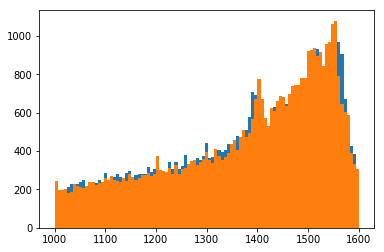

In [148]:
sel = df.run > -900
sel &= df.rechit_chip == 3

df_sel = df[sel]
bins = np.linspace(1000,1600,100)
r = plt.hist(df_sel.rechit_toaRise_max - df_sel.rechit_toaRise_min, bins)
r = plt.hist(df_sel.rechit_toaFall_max - df_sel.rechit_toaFall_min, bins)

In [76]:
sel = df.run > 900
#sel &= df.rechit_chip == chip

df_sel = df[sel]
bins = np.linspace(1400,1800,50)
r = plt.hist2d(df_sel.rechit_toaRise_max - df_sel.rechit_toaRise_min, 
               df_sel.rechit_toaFall_max - df_sel.rechit_toaFall_min, bins, norm = LogNorm())

plt.xlabel('TOA rise range (max-min)')
plt.xlabel('TOA fall range (max-min)')

Text(0.5,0,u'TOA fall range (max-min)')

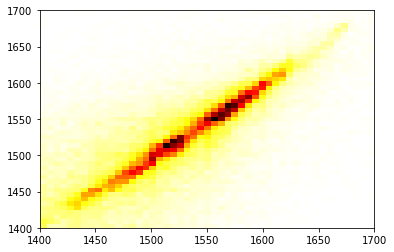

In [55]:
sel = df.run > 900
#sel &= df.rechit_chip == chip

df_sel = df[sel]
bins = np.linspace(1400,1700,50)
r = plt.hist2d(df_sel.rechit_toaRise_max - df_sel.rechit_toaRise_min, 
               df_sel.rechit_toaFall_max - df_sel.rechit_toaFall_min, bins)#, norm = LogNorm())

In [164]:
sel = df.run > 900
#sel &= df.rechit_chip == chip
sel &= abs(df.range_ratio-1) < 0.9

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist(df_sel.range_ratio, 50)#, norm = LogNorm())

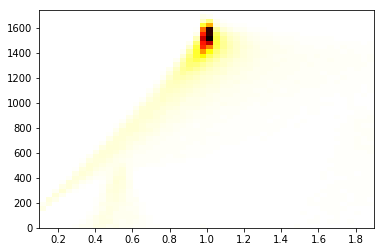

In [165]:
sel = df.run > 900
#sel &= df.rechit_chip == chip
sel &= abs(df.range_ratio-1) < 0.9

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.range_ratio, (df_sel.rise_range), 50)#, norm = LogNorm())

In [166]:
sel = df.run > 900
#sel &= df.rechit_chip == chip
sel &= abs(df.range_ratio-1) < 0.9

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.range_ratio, (df_sel.fall_range), 50)#, norm = LogNorm())

Text(0,0.5,u'TOA range ratios')

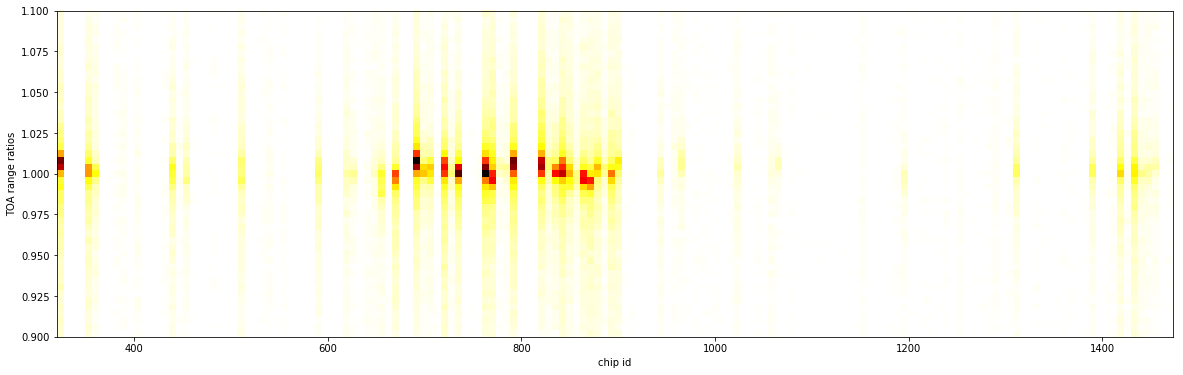

In [155]:
plt.figure(figsize = (20,6))

sel = df.run > 900
#sel &= df.rechit_chip == chip
sel &= abs(df.range_ratio-1) < 0.9

df_sel = df[sel]
bins = np.linspace(0.9,1.1,50)
r = plt.hist2d(df_sel.rechit_chip_id, df_sel.range_ratio, (40*4,bins))#, norm = LogNorm())

plt.xlabel('chip id')
plt.ylabel('TOA range ratios')

Text(0,0.5,u'TOA range ratios')

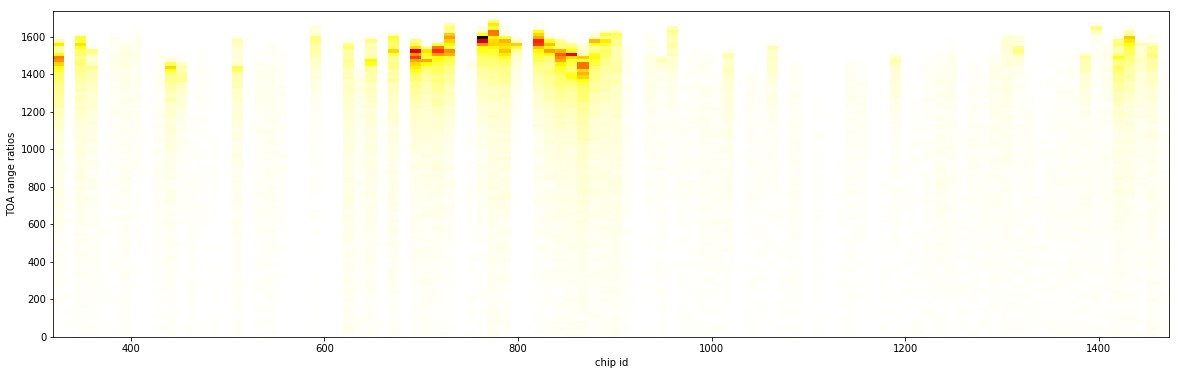

In [169]:
plt.figure(figsize = (20,6))

sel = df.run > 900
#sel &= df.rechit_chip == chip
sel &= abs(df.range_ratio-1) < 0.9

df_sel = df[sel]
r = plt.hist2d(df_sel.rechit_chip_id, df_sel.rise_range, (100))#, norm = LogNorm())

plt.xlabel('chip id')
plt.ylabel('TOA range ratios')

Text(0,0.5,u'TOA range')

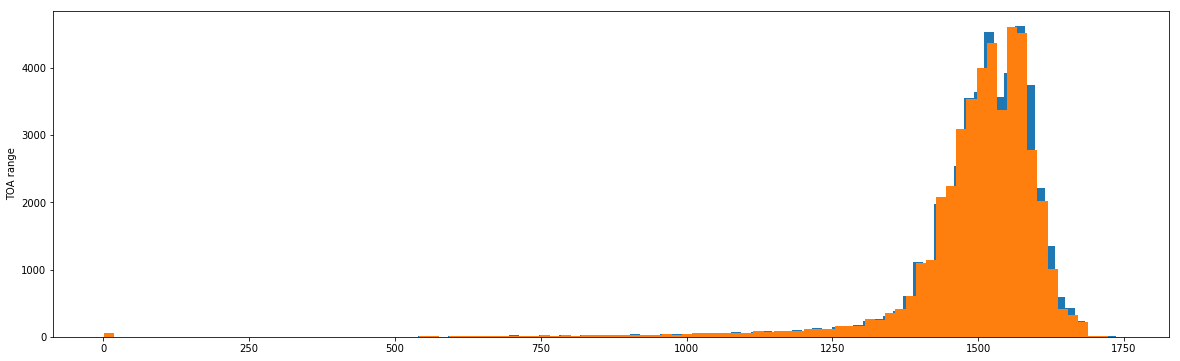

In [190]:
plt.figure(figsize = (20,6))

sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01

df_sel = df[sel]
r = plt.hist(df_sel.rise_range, (100))
r = plt.hist(df_sel.fall_range, (100))

plt.ylabel('TOA range')

In [181]:
plt.figure(figsize = (20,6))

sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01

df_sel = df[sel]
r = plt.hist2d(df_sel.run,df_sel.rise_range, (100))
#r = plt.hist(df_sel.fall_range, (100))

plt.ylabel('TOA range')

Text(0,0.5,u'TOA range')

Text(0,0.5,u'TOA range')

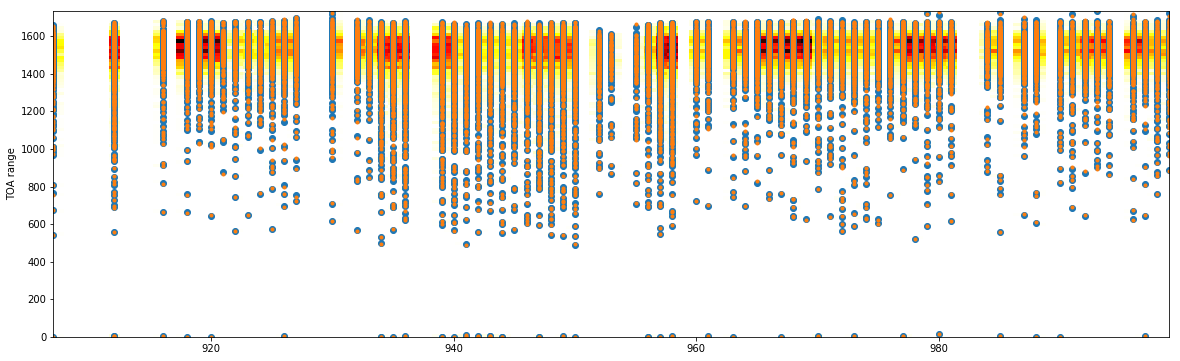

In [187]:
plt.figure(figsize = (20,6))

sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01

df_sel = df[sel]

plt.hist2d(df_sel.run,df_sel.rise_range, (100))
plt.plot(df_sel.run,df_sel.rise_range,'o')
plt.plot(df_sel.run,df_sel.fall_range,'.')

plt.ylabel('TOA range')

In [261]:
df.groupby('rechit_module').size()

rechit_module
32     8672
34     1625
35     7741
36     5139
37     1527
38     2394
39     2883
40     2439
43     2643
44     6243
45     3553
46     2058
48     2477
51     5837
53     2549
54     2576
55     2162
59     3109
62     6411
63     1989
64     2389
65     6911
66     1488
67     7646
69     8679
70     7838
71     2114
72     8596
73     8697
75     1794
       ... 
118    1423
119    2607
120    1457
121    1628
122    1930
123    1897
124    1989
125    2298
126    1827
127    2147
128    2137
129    2358
130    2152
131    3180
132    1672
133    2115
134    1706
135    2012
136    2191
137    2070
138    2033
139    3359
140    1991
141    2504
142    7411
143    7791
144    3899
145    5624
146    1204
147    2047
Length: 93, dtype: int64

In [198]:
plt.figure(figsize = (20,6))

sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1400
sel &= df.rise_range > 1400

df_sel = df[sel]

plt.hist2d(df_sel.run,df_sel.rise_range, (100))
plt.plot(df_sel.run,df_sel.rise_range,'o')
plt.plot(df_sel.run,df_sel.fall_range,'.')

plt.ylabel('TOA range')

Text(0,0.5,u'TOA range')

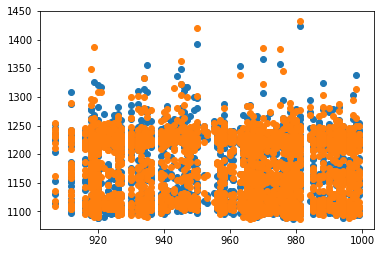

In [199]:
sel = df.rechit_module == 73
#sel &= df.rechit_chip == 0
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1400

df_sel = df[sel]
plt.plot(df_sel.run, df_sel.rechit_toaRise_min, 'o')
plt.plot(df_sel.run, df_sel.rechit_toaFall_min, 'o')

In [202]:
sel = df.rechit_module == 73
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1400
sel &= df.rise_range > 1400

for chip in range(4):
    c_sel = sel & (df.rechit_chip == 0)

    df_sel = df[c_sel]
    plt.plot(df_sel.run, df_sel.rechit_toaRise_min, 'o')
    plt.plot(df_sel.run, df_sel.rechit_toaFall_min, '.')

In [359]:
iterables = [df.rechit_module.unique(), range(4), range(64)]
names = ['rechit_module', 'rechit_chip', 'rechit_channel']
multiidx = pd.MultiIndex.from_product(iterables, names=names)
df_ranges_fin = pd.DataFrame('-1', multiidx, ['toa_min','toa_max'])

In [360]:
df_ranges_fin.head()

toa_min toa_max
rechit_module rechit_chip rechit_channel                
32            0           0                   -1      -1
                          1                   -1      -1
                          2                   -1      -1
                          3                   -1      -1
                          4                   -1      -1

In [317]:
df_cnts = pd.DataFrame(df.groupby(['rechit_module','rechit_chip','rechit_channel']).size())

In [320]:
df_ranges_fin.join(df_cnts).head()

toa_min toa_max     0
rechit_module rechit_chip rechit_channel                      
32            0           0                   -1      -1  68.0
                          1                   -1      -1   NaN
                          2                   -1      -1  68.0
                          3                   -1      -1   NaN
                          4                   -1      -1  69.0

In [197]:
sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1400

#df[sel].groupby(['rechit_module','rechit_chip','rechit_channel']).size().reset_index()
df[sel].groupby(['rechit_module']).size()[:10]#.reset_index()

rechit_module
32    1892
35    1182
36     483
37       1
38      21
39      44
40      35
43       3
44     655
45     188
dtype: int64

In [212]:
sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1000

#df[sel].groupby(['rechit_module','rechit_chip','rechit_channel']).size().reset_index()
df[sel].groupby(['rechit_module','rechit_chip'])['rechit_toaFall_max'].max()[:10]#.reset_index()

rechit_module  rechit_chip
32             0              2549
               1              2600
               2              2561
               3              2768
34             0              2684
               1              2687
               2              2648
35             0              2748
               1              2819
               2              2759
Name: rechit_toaFall_max, dtype: int64

In [241]:
df_max = df[sel].groupby(['rechit_module','rechit_chip'])['rechit_toaFall_max','rechit_toaRise_max'].max()
df_min = df[sel].groupby(['rechit_module','rechit_chip'])['rechit_toaFall_min','rechit_toaRise_min'].min()

df_ranges = df_max.join(df_min)

In [242]:
df_ranges['toa_max'] = df_ranges.apply(lambda x: max(x.rechit_toaFall_max,x.rechit_toaRise_max), axis = 1)
df_ranges['toa_min'] = df_ranges.apply(lambda x: min(x.rechit_toaFall_min,x.rechit_toaRise_min), axis = 1)

In [246]:
df_ranges = df_ranges[['toa_max','toa_min']].copy()
df_ranges['range'] = df_ranges['toa_max'] - df_ranges['toa_min']

In [255]:
#df_ranges.reset_index().groupby('rechit_module')['range'].max()

In [321]:
df_ranges.tail()

toa_max  toa_min  range
rechit_module rechit_chip                         
146           0               2628     1234   1394
147           0               2833     1214   1619
              1               2629     1122   1507
              2               2661     1179   1482
              3               2636     1491   1145

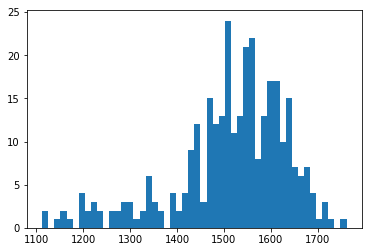

In [257]:
r = plt.hist(df_ranges.range, 50)

## Compute module averages

In [596]:
sel = df.run > 900
sel &= abs(df.range_ratio-1) < 0.01
sel &= df.fall_range > 1400

#ind_names = ['rechit_module']
#ind_names = ['rechit_module','rechit_chip']
ind_names = ['rechit_module','rechit_chip','rechit_channel']

df_max = df[sel].groupby(ind_names)['rechit_toaFall_max','rechit_toaRise_max'].max()
df_min = df[sel].groupby(ind_names)['rechit_toaFall_min','rechit_toaRise_min'].min()

df_ranges = df_max.join(df_min)

df_ranges['toa_max'] = df_ranges.apply(lambda x: max(x.rechit_toaFall_max,x.rechit_toaRise_max), axis = 1)
df_ranges['toa_min'] = df_ranges.apply(lambda x: min(x.rechit_toaFall_min,x.rechit_toaRise_min), axis = 1)

df_ranges = df_ranges[['toa_max','toa_min']].copy()
#df_ranges['range'] = df_ranges['toa_max'] - df_ranges['toa_min']

df_ranges['flag'] = 3

In [597]:
df_ranges.median()

toa_max    2684.0
toa_min    1143.0
flag          3.0
dtype: float64

In [598]:
df_ranges.head()

toa_max  toa_min  flag
rechit_module rechit_chip rechit_channel                        
32            0           2                  2522     1119     3
                          4                  2530     1051     3
                          14                 2535     1061     3
                          18                 2538     1058     3
                          20                 2543     1063     3

## Create empty df

In [599]:
iterables = [df.rechit_module.unique(), range(4), range(0,64,2)]
names = ['rechit_module', 'rechit_chip', 'rechit_channel']
multiidx = pd.MultiIndex.from_product(iterables, names=names)
df_ranges_fin = pd.DataFrame('-1', multiidx, ['toa_min','toa_max','flag'])#, dtype='int32')

In [600]:
df_ranges_fin.head()

toa_min toa_max flag
rechit_module rechit_chip rechit_channel                     
32            0           0                   -1      -1   -1
                          2                   -1      -1   -1
                          4                   -1      -1   -1
                          6                   -1      -1   -1
                          8                   -1      -1   -1

## Fill average

In [601]:
df_ranges_fin['flag'] = 0
meds = df_ranges.median()
df_ranges_fin['toa_min'] = meds.toa_min
df_ranges_fin['toa_max'] = meds.toa_max

### Fill in all modules averages

In [602]:
df_ranges_mod = df_ranges.groupby('rechit_module').median()
df_ranges_mod['flag'] = 1

In [603]:
df_ranges_mod.head()

toa_max  toa_min  flag
rechit_module                        
32              2556.0   1091.0     1
35              2734.0   1176.0     1
36              2631.0   1148.0     1
37              2781.0   1233.0     1
38              2782.0   1221.0     1

In [604]:
df_ranges_fin.reset_index(inplace = True)
df_ranges_fin.set_index('rechit_module', inplace = True)
df_ranges_fin.update(df_ranges_mod, overwrite = True)

## Per chip averages

In [605]:
df_ranges_chip = df_ranges.groupby(['rechit_module','rechit_chip']).median()
df_ranges_chip['flag'] = 2

In [606]:
df_ranges_fin.reset_index(inplace = True)
df_ranges_fin.set_index(['rechit_module','rechit_chip'], inplace = True)
df_ranges_fin.update(df_ranges_chip, overwrite = True)

## Per channel

In [613]:
df_ranges_fin.reset_index(inplace = True)
df_ranges_fin.set_index(['rechit_module','rechit_chip','rechit_channel'], inplace = True)
df_ranges_fin.update(df_ranges, overwrite = True)

In [614]:
df_ranges_fin = df_ranges_fin.astype('int32')

# Check

In [615]:
sel = df_ranges_fin.toa_min == -1
df_ranges_fin[sel].head()

Empty DataFrame
Columns: [toa_min, toa_max, flag]
Index: []

In [616]:
df_ranges_fin.flag.unique()

array([2, 3, 0, 1])

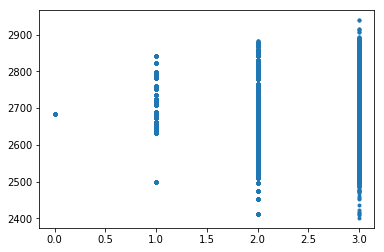

In [676]:
plt.plot(df_ranges_fin.flag, df_ranges_fin.toa_max ,'.')

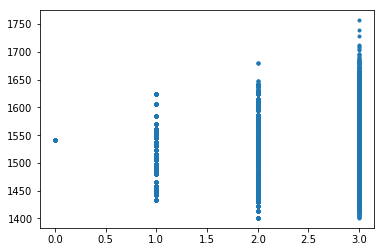

In [623]:
plt.plot(df_ranges_fin.flag, df_ranges_fin.toa_max - df_ranges_fin.toa_min,'.')

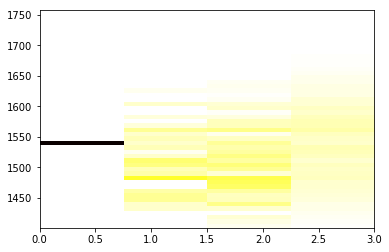

In [621]:
r = plt.hist2d(df_ranges_fin.flag, df_ranges_fin.toa_max - df_ranges_fin.toa_min,(4,50))

In [624]:
df_ranges_fin.head()

toa_min  toa_max  flag
rechit_module rechit_chip rechit_channel                        
32            0           0                  1071     2540     2
                          2                  1119     2522     3
                          4                  1051     2530     3
                          6                  1071     2540     2
                          8                  1071     2540     2

# Output

names: 

#Module_ID  #ASIC_ID  #Channel  #toa_min  #toa_max  #toa_func_a  #toa_func_b  #toa_func_c  #toa_func_d  #tw_func_a  #tw_func_b  #tw_func_c  #tw_func_d  #t0_offset

78  0   0  1132  2733  -14.9  27.98  3.86  1.295  0  6.24  558  -78.5  0

In [625]:
df_calib = df_ranges_fin.copy()

## toa calib

In [658]:
names = ['toa_func_a','toa_func_b', 'toa_func_c','toa_func_d', 'tw_func_a' ,'tw_func_b' ,'tw_func_c',  'tw_func_d', 't0_offset']
vals = [-14.9,  27.98 , 3.86,  1.295, 0,  6.24,  558,  -78.5,  0]

In [659]:
for val, name in zip(vals, names):
    df_calib[name] = val

In [672]:
df_calib.columns

Index([u'toa_min', u'toa_max', u'flag', u'toa_func_a', u'toa_func_b',
       u'toa_func_c', u'toa_func_d', u'tw_func_a', u'tw_func_b', u'tw_func_c',
       u'tw_func_d', u't0_offset'],
      dtype='object')

In [674]:
cols = [u'toa_min', u'toa_max',u'toa_func_a', u'toa_func_b',
         u'toa_func_c', u'toa_func_d', u'tw_func_a', u'tw_func_b', u'tw_func_c',
         u'tw_func_d', u't0_offset', u'flag']

df_calib.to_csv('toa_test_calib.txt',columns = cols, sep="\t")

In [675]:
! head toa_test_calib.txt

rechit_module	rechit_chip	rechit_channel	toa_min	toa_max	toa_func_a	toa_func_b	toa_func_c	toa_func_d	tw_func_a	tw_func_b	tw_func_c	tw_func_d	t0_offset	flag
32	0	0	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
32	0	2	1119	2522	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	3
32	0	4	1051	2530	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	3
32	0	6	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
32	0	8	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
32	0	10	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
32	0	12	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
32	0	14	1061	2535	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	3
32	0	16	1071	2540	-14.9	27.98	3.86	1.295	0	6.24	558	-78.5	0	2
